# Exploring the Interior Structure of Stars

#### 1) In one figure, generate a log-log plot of radius versus mass, both relative to the solar values. Fit a power-law relationship to the so-called mass-radius relation and compare your results to the “accepted” value.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import math
import glob
import numpy as np
from scipy import stats
from __future__ import division, print_function

In [2]:
# Reads in the mass and log(radius) for each star
mass05,log_radius05,log_lum05,HI05 = np.loadtxt("MESA_0.5/trimmed_history.data",skiprows=6,usecols=(2,4,3,10),unpack=True)
mass1,log_radius1,log_lum1,HI1 = np.loadtxt("MESA_1.0/trimmed_history.data",skiprows=6,usecols=(2,4,3,10),unpack=True)
mass3,log_radius3,log_lum3,HI3 = np.loadtxt("MESA_3.0/trimmed_history.data",skiprows=6,usecols=(2,4,3,10),unpack=True)
mass8,log_radius8,log_lum8,HI8 = np.loadtxt("MESA_8.0/trimmed_history.data",skiprows=6,usecols=(2,4,3,10),unpack=True)
mass15,log_radius15,log_lum15,HI15 = np.loadtxt("MESA_15.0/trimmed_history.data",skiprows=6,usecols=(2,4,3,10),unpack=True)

769
781
924
921
952
[-0.36781489 -0.01861976  0.47464817  0.89186862  1.16806588]
[ 1.62309401  1.68409624  2.01202703  2.71788068  2.81801788]
[ 0.86279368  1.80034146]


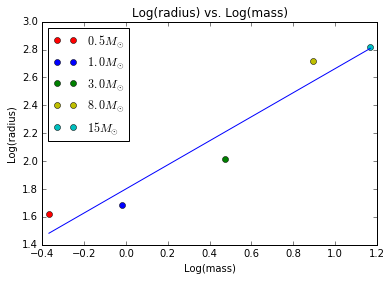

In [3]:
hist05=np.loadtxt('MESA_0.5/trimmed_history.data',skiprows=6)
HI_05=hist05[:,10]
first_05=np.where((HI_05[0]-HI_05)>3e-3)[0]
print (first_05[0])

hist1=np.loadtxt('MESA_1.0/trimmed_history.data',skiprows=6)
HI_1=hist1[:,10]
first_1=np.where((HI_1[0]-HI_1)>3e-3)[0]
print (first_1[0])

hist3=np.loadtxt('MESA_3.0/trimmed_history.data',skiprows=6)
HI_3=hist3[:,10]
first_3=np.where((HI_3[0]-HI_3)>3e-3)[0]
print (first_3[0])

hist8=np.loadtxt('MESA_8.0/trimmed_history.data',skiprows=6)
HI_8=hist8[:,10]
first_8=np.where((HI_8[0]-HI_8)>3e-3)[0]
print (first_8[0])

hist15=np.loadtxt('MESA_15.0/trimmed_history.data',skiprows=6)
HI_15=hist15[:,10]
first_15=np.where((HI_15[0]-HI_15)>3e-3)[0]
print (first_15[0])

# Assign columns to mass and log_radius
M_05=mass05[first_05]
final_M05=M_05[-1]
final_R05=log_radius05[-1]

M_1=mass1[first_1]
final_M1=M_1[-1]
final_R1=log_radius1[-1]

M_3=mass3[first_3]
final_M3=M_3[-1]
final_R3=log_radius3[-1]

M_8=mass8[first_8]
final_M8=M_8[-1]
final_R8=log_radius8[-1]

M_15=mass15[first_15]
final_M15=M_15[-1]
final_R15=log_radius15[-1]

# Converts mass to log(mass)
log_mass05=np.log10(M_05)
log_mass1=np.log10(M_1)
log_mass3=np.log10(M_3)
log_mass8=np.log10(M_8)
log_mass15=np.log10(M_15)

masses=[]
radii=[]

masses.append(log_mass05[-1])
masses.append(log_mass1[-1])
masses.append(log_mass3[-1])
masses.append(log_mass8[-1])
masses.append(log_mass15[-1])

radii.append(final_R05)
radii.append(final_R1)
radii.append(final_R3)
radii.append(final_R8)
radii.append(final_R15)

masses=np.array(masses)
radii=np.array(radii)

print (masses)
print (radii)
# We want the mass right before it leaves the main sequence

# Plots log_radius vs. log_mass
plt.figure()
plt.plot(log_mass05[-1],log_radius05[-1],'ro',label='$0.5 M_{\odot}$')
plt.xlabel('Log(mass)')
plt.ylabel('Log(radius)')
plt.title('Log(radius) vs. Log(mass)')

plt.plot(log_mass1[-1],log_radius1[-1],'bo',label='$1.0 M_{\odot}$')
plt.xlabel('Log(mass)')
plt.ylabel('Log(radius)')
plt.title('Log(radius) vs. Log(mass)')

plt.plot(log_mass3[-1],log_radius3[-1],'go',label='$3.0 M_{\odot}$')
plt.xlabel('Log(mass)')
plt.ylabel('Log(radius)')
plt.title('Log(radius) vs. Log(mass)')

plt.plot(log_mass8[-1],log_radius8[-1],'yo',label='$8.0 M_{\odot}$')
plt.xlabel('Log(mass)')
plt.ylabel('Log(radius)')
plt.title('Log(radius) vs. Log(mass)')

plt.plot(log_mass15[-1],log_radius15[-1],'co',label='$15 M_{\odot}$')
plt.xlabel('Log(mass)')
plt.ylabel('Log(radius)')
plt.title('Log(radius) vs. Log(mass)')
plt.legend(loc='upper left')
plt.savefig('Log-mass-vs.log-radius.png')

fit=np.polyfit(masses,radii,1)
print (fit)

radius=0.86279368*masses+1.80034146
plt.plot(masses,radius)

The accepted value of the mass-radius relation is 0.8 while the value that which is close to my value of the slope, 0.86.

#### 2) In one figure, create a log-log plot of luminosity versus mass, both relative to the solar values. Fit a power-law relationship to the so-called mass-luminosity relation and compare your results to the “accepted” value.

[ 1.67705234  2.80991707]


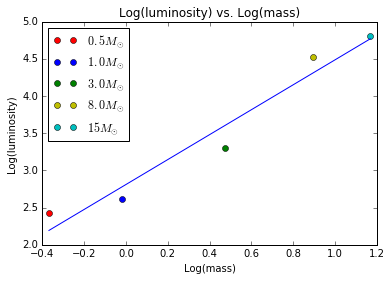

In [4]:
# Assign columns to luminosity
final_L05=log_lum05[-1]
final_L1=log_lum1[-1]
final_L3=log_lum3[-1]
final_L8=log_lum8[-1]
final_L15=log_lum15[-1]

luminosity=[]

luminosity.append(final_L05)
luminosity.append(final_L1)
luminosity.append(final_L3)
luminosity.append(final_L8)
luminosity.append(final_L15)

luminosity=np.array(luminosity)

# Plots log_luminosity vs. log_mass
plt.figure()
plt.plot(log_mass05[-1],log_lum05[-1],'ro',label='$0.5 M_{\odot}$')
plt.xlabel('Log(mass)')
plt.ylabel('Log(luminosity)')
plt.title('Log(luminosity) vs. Log(mass)')

plt.plot(log_mass1[-1],log_lum1[-1],'bo',label='$1.0 M_{\odot}$')
plt.xlabel('Log(mass)')
plt.ylabel('Log(luminosity)')
plt.title('Log(luminosity) vs. Log(mass)')

plt.plot(log_mass3[-1],log_lum3[-1],'go',label='$3.0 M_{\odot}$')
plt.xlabel('Log(mass)')
plt.ylabel('Log(luminosity)')
plt.title('Log(luminosity) vs. Log(mass)')

plt.plot(log_mass8[-1],log_lum8[-1],'yo',label='$8.0 M_{\odot}$')
plt.xlabel('Log(mass)')
plt.ylabel('Log(luminosity)')
plt.title('Log(luminosity) vs. Log(mass)')

plt.plot(log_mass15[-1],log_lum15[-1],'co',label='$15 M_{\odot}$')
plt.xlabel('Log(mass)')
plt.ylabel('Log(luminosity)')
plt.title('Log(luminosity) vs. Log(mass)')
plt.legend(loc='upper left')
plt.savefig('Log-lum-vs.log-mass.png')

fit2=np.polyfit(masses,luminosity,1)
print (fit2)

luminosities=1.67705234*masses+2.80991707
plt.plot(masses,luminosities)

The accepted value of the luminosity-radius relation is 3.5 which is slightly off from my value of the slope, 1.68.

#### 3) Generate two different figures with all five stars overplotted showing pressure vs r/R and temperature vs r/R, where r is the radius vector and R is the final radius of the star. Write a short discussion of your results.

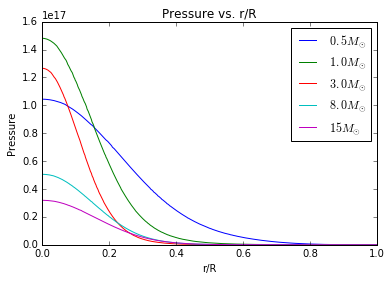

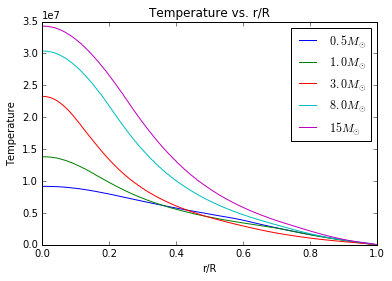

In [5]:
pressure05,radius_05,log_temp05 = np.loadtxt("MESA_0.5/profile9.data",skiprows=6,usecols=(3,1,5),unpack=True)
pressure1,radius_1,log_temp1 = np.loadtxt("MESA_1.0/profile9.data",skiprows=6,usecols=(3,1,5),unpack=True)
pressure3,radius_3,log_temp3 = np.loadtxt("MESA_3.0/profile11.data",skiprows=6,usecols=(3,1,5),unpack=True)
pressure8,radius_8,log_temp8 = np.loadtxt("MESA_8.0/profile11.data",skiprows=6,usecols=(3,1,5),unpack=True)
pressure15,radius_15,log_temp15 = np.loadtxt("MESA_15.0/profile11.data",skiprows=6,usecols=(3,1,5),unpack=True)

r_over_R05 = radius_05/radius_05[0]
r_over_R1 = radius_1/radius_1[0]
r_over_R3 = radius_3/radius_3[0]
r_over_R8 = radius_8/radius_8[0]
r_over_R15 = radius_15/radius_15[0]

temp05 = 10**log_temp05
temp1 = 10**log_temp1
temp3 = 10**log_temp3
temp8 = 10**log_temp8
temp15 = 10**log_temp15

# Plots pressure vs. r/R
plt.figure()
plt.plot(r_over_R05,pressure05,label='$0.5 M_{\odot}$')
plt.xlabel('r/R')
plt.ylabel('Pressure')
plt.title('Pressure vs. r/R')

plt.plot(r_over_R1,pressure1,label='$1.0 M_{\odot}$')
plt.xlabel('r/R')
plt.ylabel('Pressure')
plt.title('Pressure vs. r/R')

plt.plot(r_over_R3,pressure3,label='$3.0 M_{\odot}$')
plt.xlabel('r/R')
plt.ylabel('Pressure')
plt.title('Pressure vs. r/R')

plt.plot(r_over_R8,pressure8,label='$8.0 M_{\odot}$')
plt.xlabel('r/R')
plt.ylabel('Pressure')
plt.title('Pressure vs. r/R')

plt.plot(r_over_R15,pressure15,label='$15 M_{\odot}$')
plt.xlabel('r/R')
plt.ylabel('Pressure')
plt.title('Pressure vs. r/R')
plt.legend(loc='upper right')
plt.savefig('Pressure-vs-R.png')


# Plots temperature vs. r/R
plt.figure()
plt.plot(r_over_R05,temp05,label='$0.5 M_{\odot}$')
plt.xlabel('r/R')
plt.ylabel('Temperature')
plt.title('Temperature vs. r/R')

plt.plot(r_over_R1,temp1,label='$1.0 M_{\odot}$')
plt.xlabel('r/R')
plt.ylabel('Temperature')
plt.title('Temperature vs. r/R')

plt.plot(r_over_R3,temp3,label='$3.0 M_{\odot}$')
plt.xlabel('r/R')
plt.ylabel('Temperature')
plt.title('Temperature vs. r/R')

plt.plot(r_over_R8,temp8,label='$8.0 M_{\odot}$')
plt.xlabel('r/R')
plt.ylabel('Temperature')
plt.title('Temperature vs. r/R')

plt.plot(r_over_R15,temp15,label='$15 M_{\odot}$')
plt.xlabel('r/R')
plt.ylabel('Temperature')
plt.title('Temperature vs. r/R')
plt.legend(loc='upper right')
plt.savefig('Temperature-vs-R.png')

From the Pressure vs. r/R graph above, we see that as you recede from the center of the star, the pressure decreases exponentially, which makes sense. However, the central pressure is lower in the centers of higher mass stars. This is because surface gravity is inversely proportional to the mass of the star. This means that pressure is greater in lower mass main sequence stars than in high mass ones. However, my graph states that my 1 solar mass and 3 solar mass stars have higher pressures than my 0.5 solar mass star. Additionally, my 8 solar mass and 15 solar mass stars are switched.

From the Temperature vs. r/R graph above, we see that as you recede from the center of the star, the temperature also decreases exponentially. Additionally, lower mass stars have lower temperatures. Again, there is a discrepancy in my graph regarding the 8 and 15 solar mass stars.

#### Bonus! Generate the same set of plots for stars of a different metallicity. Generate appropriate plots that compares stars of the same mass but of different composition and discuss your results.